<div class="alert alert-success">  
    <h1 align="center" style="color:darkcyan;">Google Smartphone Decimeter Challenge 2022</h1>  
</div>

<div>
    <h1 align="center" style="color:darkcyan;"><< One by One >></h1>
    <h1 align="center" style="color:darkcyan;">Coordinate with NearestNeighbors</h1>    
</div>

<div class="alert alert-success">  
</div>

#### - Usually when you "Ensemble" between the results of two or more notebooks, you specify coefficients that are multiplied in all rows. In this way, the results will probably get better in some rows, and at the same time, in some other rows, the results may get worse. However, if the results are generally better, we consider this "ensemble" successful.

#### - In any case, we should not forget that finding the coefficients for "Ensembling" with our eyes closed will probably make the results of some rows worse, but sometimes we do not realize this, because our overall score has improved anyway. 

#### - By the way, if the results of the notebooks are two or more dimensions, it will be really harder to choose the coefficients for "Ensembling", and only by guessing or a lot of trial and error, maybe it can be successful.

#### - In this notebook, we will share our innovative method for "Coordinate [One by One]" the results and you will see that for each row, we perform separate calculations and And we determine the order of proximity of all points in a row. Then we can use the point that has the highest score in this row as the main basis and, for example, combine the value of this point with the point closest to itself (Blend or Snap).

#### - We use "NearestNeighbors" for each row, which makes the calculations a bit slow. Of course you can use other methods.

<img src="https://raw.githubusercontent.com/MehranKazeminia/fifa-worldcup-2018/master/dart101.png">

## **<span style="color:darkred;">Adolphe Quetelet (1796-1874):</span>**

#### Suppose in a match, shooters throw their arrows at a target. Then, for some reason, the point that marks the center of the target disappears. If the number of arrows is large enough, the actual position of the target can be regained.

<div class="alert alert-success">  
</div>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# <span style="color:darkcyan;">Data-Sets</span>

#### To illustrate this, I used the results of my notebook and the results of five public notebooks. Thanks to everyone who published their great notebooks, especially:

##### @**saitodevel01**, @**robikscube**, @**dienhoa**, @**ravishah1**, @**taroz1461**, @**saurabhbagchi**

In [2]:
SAMPLE = pd.read_csv('../input/smartphone-decimeter-2022/sample_submission.csv')
display(SAMPLE)

,tripId,UnixTimeMillis,LatitudeDegrees,LongitudeDegrees
0,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650832999,37.904611,-86.481078
1,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650833999,37.904611,-86.481078
2,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650834999,37.904611,-86.481078
3,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650835999,37.904611,-86.481078
4,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650836999,37.904611,-86.481078
...,...,...,...,...
66092,2022-04-25-US-OAK-2/GooglePixel4,1650927742650,37.904611,-86.481078
66093,2022-04-25-US-OAK-2/GooglePixel4,1650927743642,37.904611,-86.481078
66094,2022-04-25-US-OAK-2/GooglePixel4,1650927744651,37.904611,-86.481078
66095,2022-04-25-US-OAK-2/GooglePixel4,1650927745640,37.904611,-86.481078


In [3]:
path0 = '../input/gsdc224870/submission.csv' 
path1 = '../input/gsdc224823/submission.csv'
path2 = '../input/gsdc224581/submission.csv' 
path3 = '../input/gsdc224376/submission.csv' 
path4 = '../input/gsdc223355/submission.csv'
path5 = '../input/carriersmoothingrobust-submission-score-3013/submission.csv'

path  = [path0, path1, path2, path3, path4, path5]

<div class="alert alert-success">  
</div>

# <span style="color:darkcyan;">Coordinate - One by One</span>

In [4]:
QT = [[], [], [], [], [], []]
QN = [[], [], [], [], [], []]

for k in range(len(path)):    
    sub_k = pd.read_csv(path[k]).values  
    PT = []
    PN = []    
    for j in range(len(SAMPLE)):
        PT.append([sub_k[j][2]])     
        PN.append([sub_k[j][3]])   
    QT[k] = PT  
    QN[k] = PN  

In [5]:
def near_plt(points, best_score, support, best_1, generated):
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(10, 10), facecolor='lightblue')
    plt.title(f'\nC O O R D I N A T E\n\n{SAMPLE.iloc[i][:2]}')   
    
    plt.scatter(points[0], points[1], s=200, facecolor='lightblue', edgecolor='black', label='All Points')
    plt.scatter(best_score[0], best_score[1], s=200, facecolor='violet', edgecolor='black', label='Best Score')
    plt.scatter(support[0], support[1], s=200, facecolor='yellow', edgecolor='black', label='Support')    
    plt.scatter(generated[0], generated[1], s=150, marker='x', label='Generated')
    plt.scatter(best_1[0], best_1[1], s=150, marker='x', label='Best-1 (To Check)')
   
    plt.legend(fontsize=12)
    plt.xlabel('LatitudeDegrees', fontsize=12)
    plt.ylabel('LongitudeDegrees', fontsize=12)
    plt.savefig(f'Coordinate_{i}.png')
    plt.show()

## **<span style="color:darkred;">Note:</span>**

#### - You can compare the results of your notebook with many other notebooks. You can even use one or two or ... the nearest points. Then "Coordinate" each row of your results. Also, easily try different coefficients.

#### - If the red cross (Best-1) is on the yellow circle, it means that the point closest to Best_Score is the point that scores exactly after Best_Score. But if the red cross (Best-1) is on the blue circle, that is, in this row, a point with a lower score is closer to the Best_Score point. Of course, we did not know about it before, but now we can use the same point to combine the results of this.

#### - In order to be more accurate, in version 9, I made some changes in the calculations. I have done calculations for LatitudeDegrees and LongitudeDegrees columns separately. In addition, (as I explained earlier) individual rows are also calculated separately. For this reason, the execution time has been almost doubled.




Row >>>>> 5442
tripId            2021-08-17-US-MTV-1/GooglePixel5
UnixTimeMillis                       1629233698442
Name: 5442, dtype: object


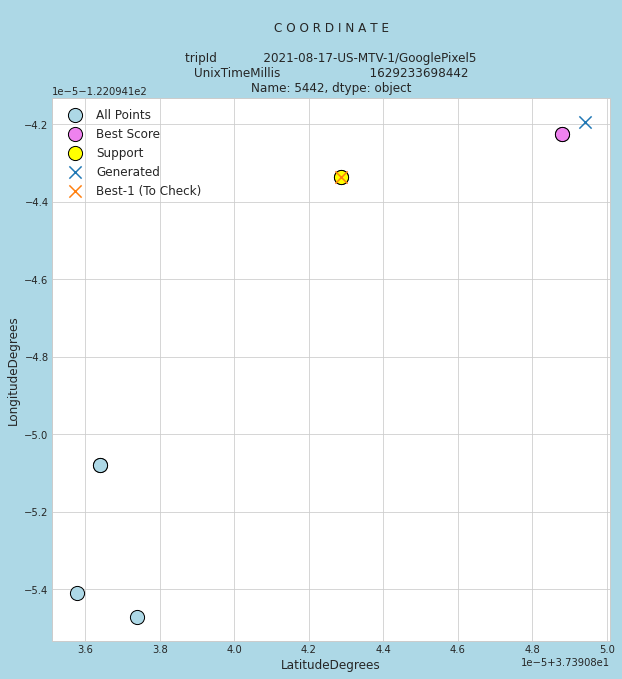




Row >>>>> 5786
tripId            2021-08-17-US-MTV-1/GooglePixel5
UnixTimeMillis                       1629234042442
Name: 5786, dtype: object


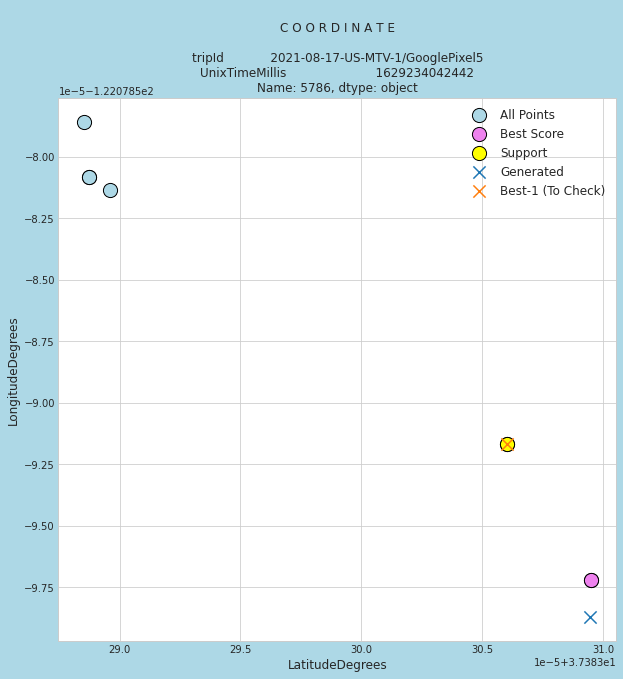




Row >>>>> 9491
tripId            2021-09-07-US-MTV-1/SamsungGalaxyS20Ultra
UnixTimeMillis                                1631043156999
Name: 9491, dtype: object


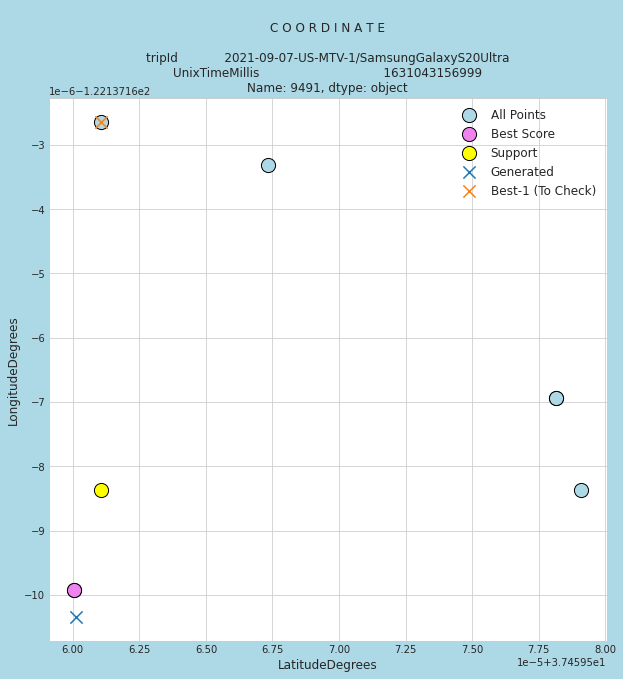




Row >>>>> 13071
tripId            2021-09-20-US-MTV-1/XiaomiMi8
UnixTimeMillis                    1632165220000
Name: 13071, dtype: object


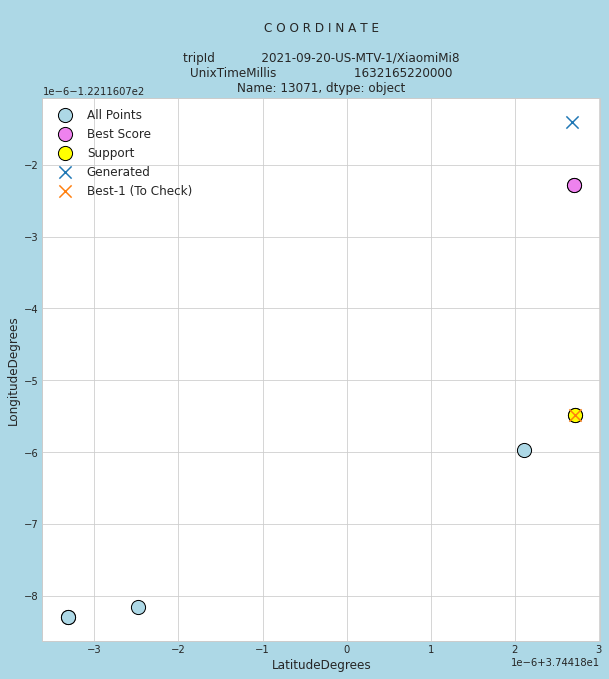




Row >>>>> 20110
tripId            2021-11-30-US-MTV-1/GooglePixel5
UnixTimeMillis                       1638306052430
Name: 20110, dtype: object


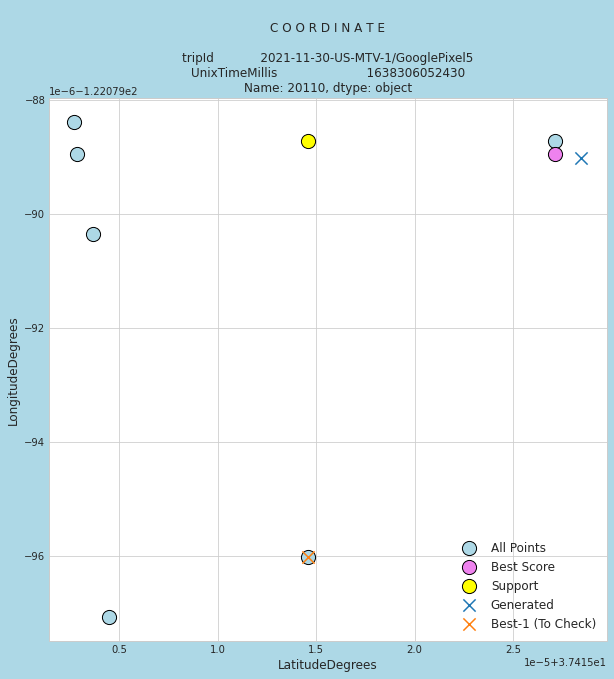




Row >>>>> 21234
tripId            2021-11-30-US-MTV-1/GooglePixel5
UnixTimeMillis                       1638307176430
Name: 21234, dtype: object


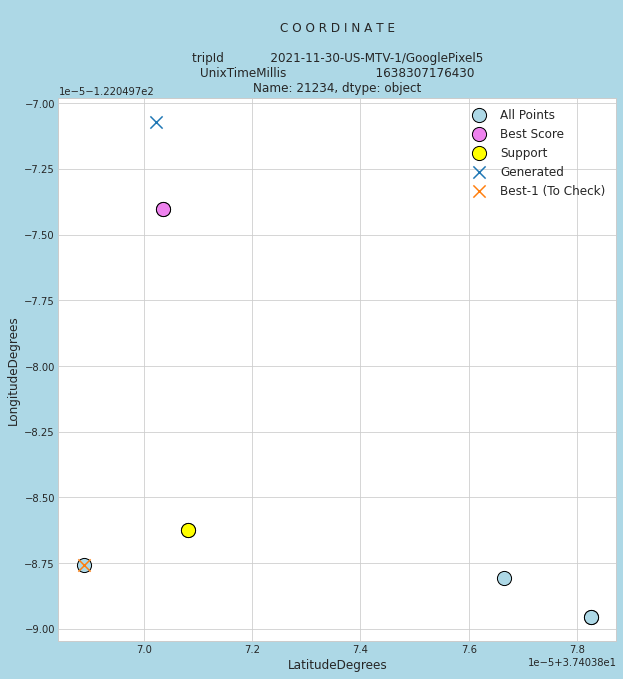




Row >>>>> 40176
tripId            2022-02-24-US-LAX-1/SamsungGalaxyS20Ultra
UnixTimeMillis                                1645743019999
Name: 40176, dtype: object


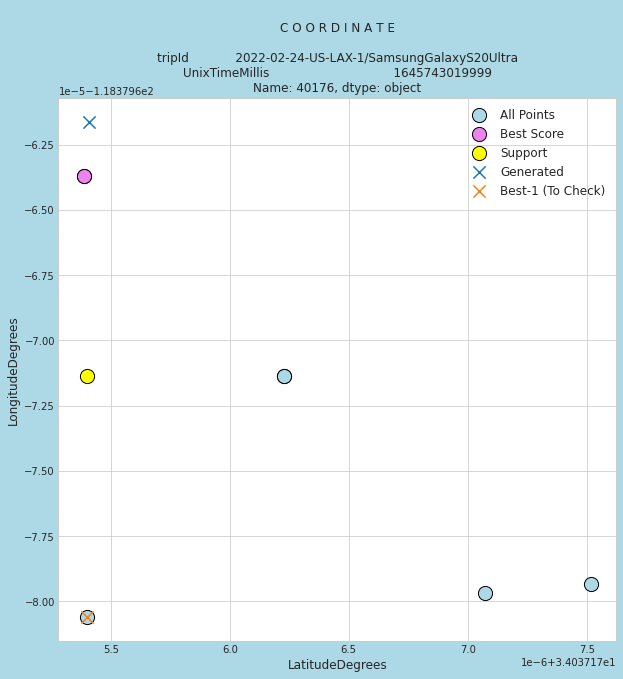




Row >>>>> 51258
tripId            2022-03-17-US-SJC-1/GooglePixel5
UnixTimeMillis                       1647549235442
Name: 51258, dtype: object


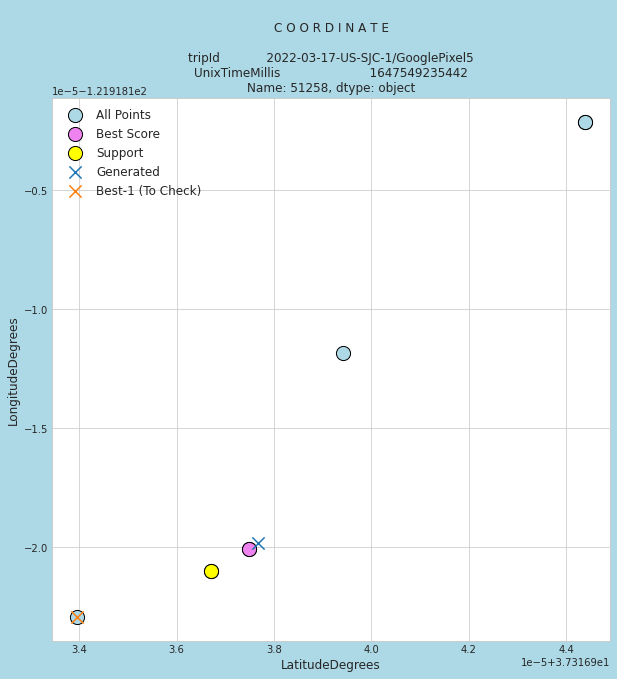




Row >>>>> 56413
tripId            2022-03-31-US-LAX-3/SamsungGalaxyS20Ultra
UnixTimeMillis                                1648751391000
Name: 56413, dtype: object


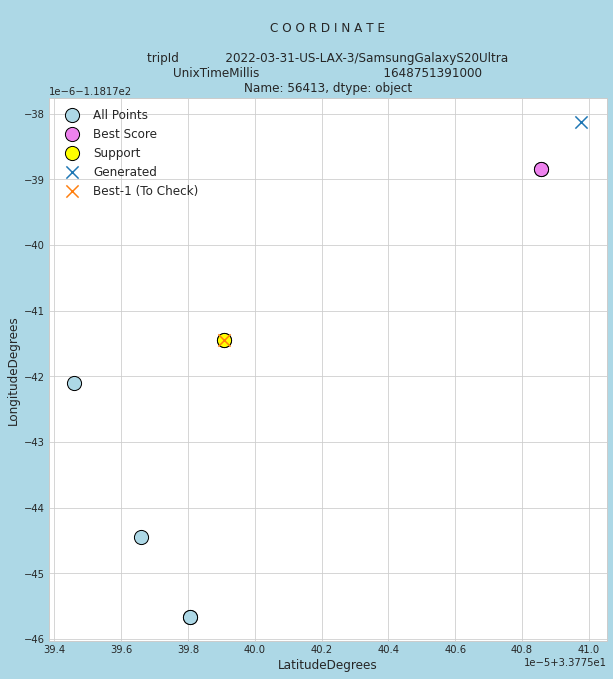




Row >>>>> 63086
tripId            2022-04-25-US-OAK-1/GooglePixel5
UnixTimeMillis                       1650921148439
Name: 63086, dtype: object


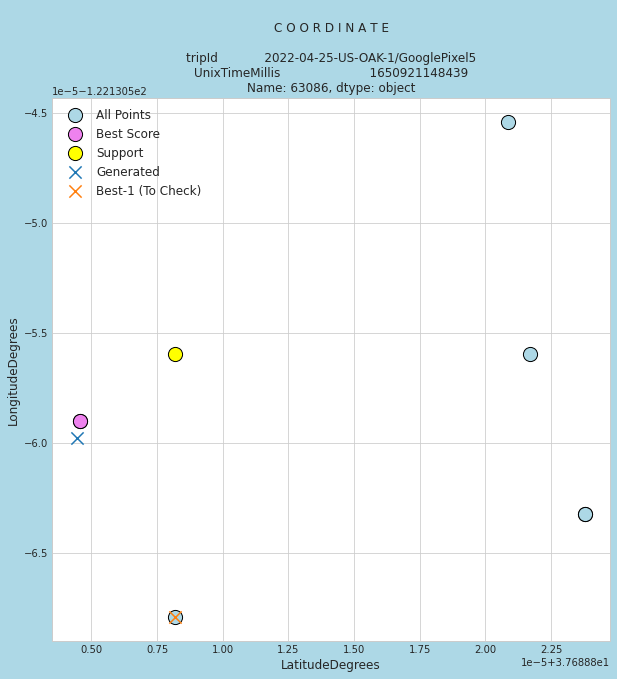




Row >>>>> 65181
tripId            2022-04-25-US-OAK-2/GooglePixel4
UnixTimeMillis                       1650926831654
Name: 65181, dtype: object


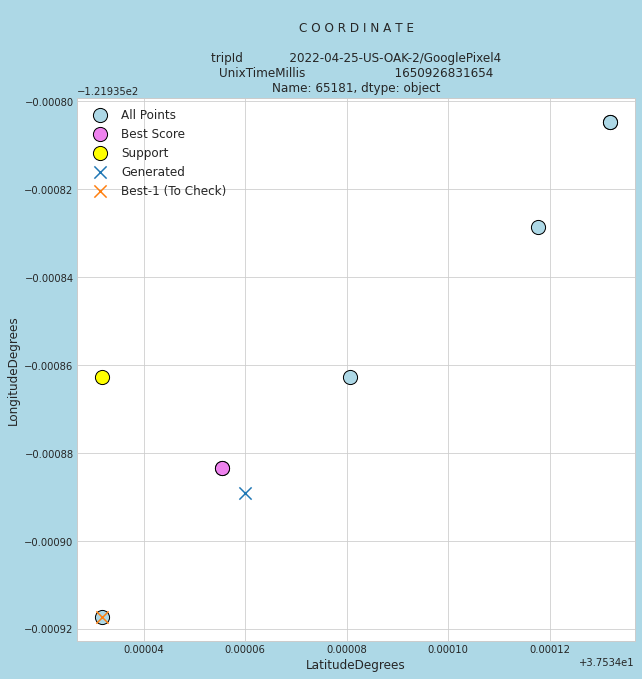




Row >>>>> 65522
tripId            2022-04-25-US-OAK-2/GooglePixel4
UnixTimeMillis                       1650927172644
Name: 65522, dtype: object


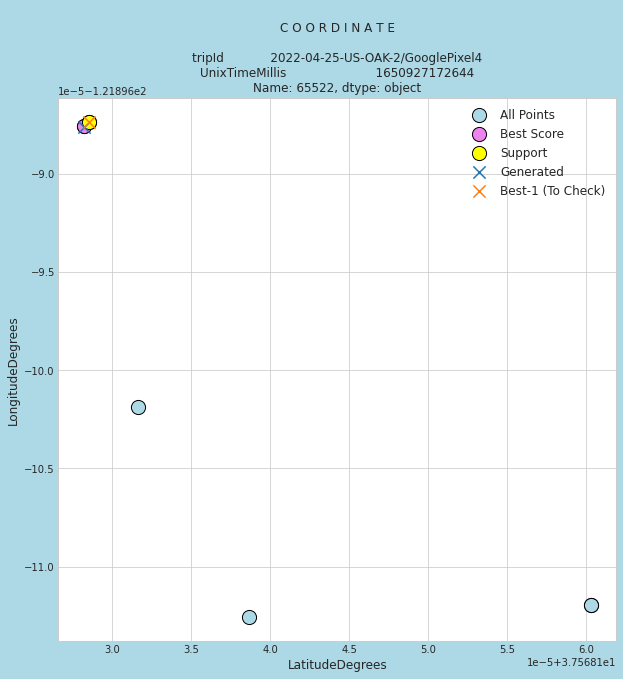

In [6]:
from sklearn.neighbors import NearestNeighbors
random_examples = np.random.randint(len(SAMPLE), size=12) # Number of examples: 10

T = [] # LatitudeDegrees
N = [] # LongitudeDegrees

for i in range(len(SAMPLE)): 
    XT = [QT[0][i], QT[1][i], QT[2][i], QT[3][i], QT[4][i], QT[5][i]]
    XN = [QN[0][i], QN[1][i], QN[2][i], QN[3][i], QN[4][i], QN[5][i]]
    
    nbrs = NearestNeighbors(n_neighbors=len(XT), algorithm='auto').fit(XT)    
    _ , indices_T = nbrs.kneighbors(XT)
    
    nbrs = NearestNeighbors(n_neighbors=len(XN), algorithm='auto').fit(XN)    
    _ , indices_N = nbrs.kneighbors(XN)
 
    tt = (1.13 * XT[indices_T[-1][0]][0]) + (-0.16 * XT[indices_T[-1][1]][0]) + (0.03 * XT[indices_T[-1][2]][0])
    T.append(tt) 
    
    nn = (1.27 * XN[indices_N[-1][0]][0]) + (-0.27 * XN[indices_N[-1][1]][0]) + (0.00 * XN[indices_N[-1][2]][0])    
    N.append(nn) 
    
    if i in random_examples:
        print(f'\n\n\nRow >>>>> {i}\n{SAMPLE.iloc[i][:2]}')
        near_plt([XT, XN], [XT[indices_T[-1][0]], XN[indices_N[-1][0]]],
                 [XT[indices_T[-1][1]], XN[indices_N[-1][1]]], [XT[-2], XN[-2]], [tt, nn])

In [7]:
sub = SAMPLE.copy()
sub['LatitudeDegrees']  = T
sub['LongitudeDegrees'] = N
sub

,tripId,UnixTimeMillis,LatitudeDegrees,LongitudeDegrees
0,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650832999,37.395759,-122.102971
1,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650833999,37.395758,-122.102968
2,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650834999,37.395758,-122.102966
3,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650835999,37.395757,-122.102970
4,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650836999,37.395756,-122.102957
...,...,...,...,...
66092,2022-04-25-US-OAK-2/GooglePixel4,1650927742650,37.656969,-121.899008
66093,2022-04-25-US-OAK-2/GooglePixel4,1650927743642,37.656972,-121.899025
66094,2022-04-25-US-OAK-2/GooglePixel4,1650927744651,37.656968,-121.899003
66095,2022-04-25-US-OAK-2/GooglePixel4,1650927745640,37.656968,-121.899025


In [8]:
sub.to_csv("submission.csv", index=False)

<div class="alert alert-success">  
</div>

<div class="alert alert-success">
    <h1 align="center" style="color:darkcyan;">Thank You.</h1> 
</div>